In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:

import matplotlib.pyplot as plt

In [4]:
import seaborn as sns


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:
import statsmodels.api as sm

In [7]:
df = pd.read_csv('laptop_prices.csv')

In [8]:
df


,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


# UNIVARIATE ANALYSIS


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [10]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [11]:
df.isna().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [12]:
df.dtypes

Brand                    object
Processor                object
RAM (GB)                  int64
Storage                  object
GPU                      object
Screen Size (inch)      float64
Resolution               object
Battery Life (hours)    float64
Weight (kg)             float64
Operating System         object
Price ($)               float64
dtype: object

In [13]:
sns.set(style="whitegrid")

In [14]:
numerical_columns = ["RAM (GB)", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Price ($)"]

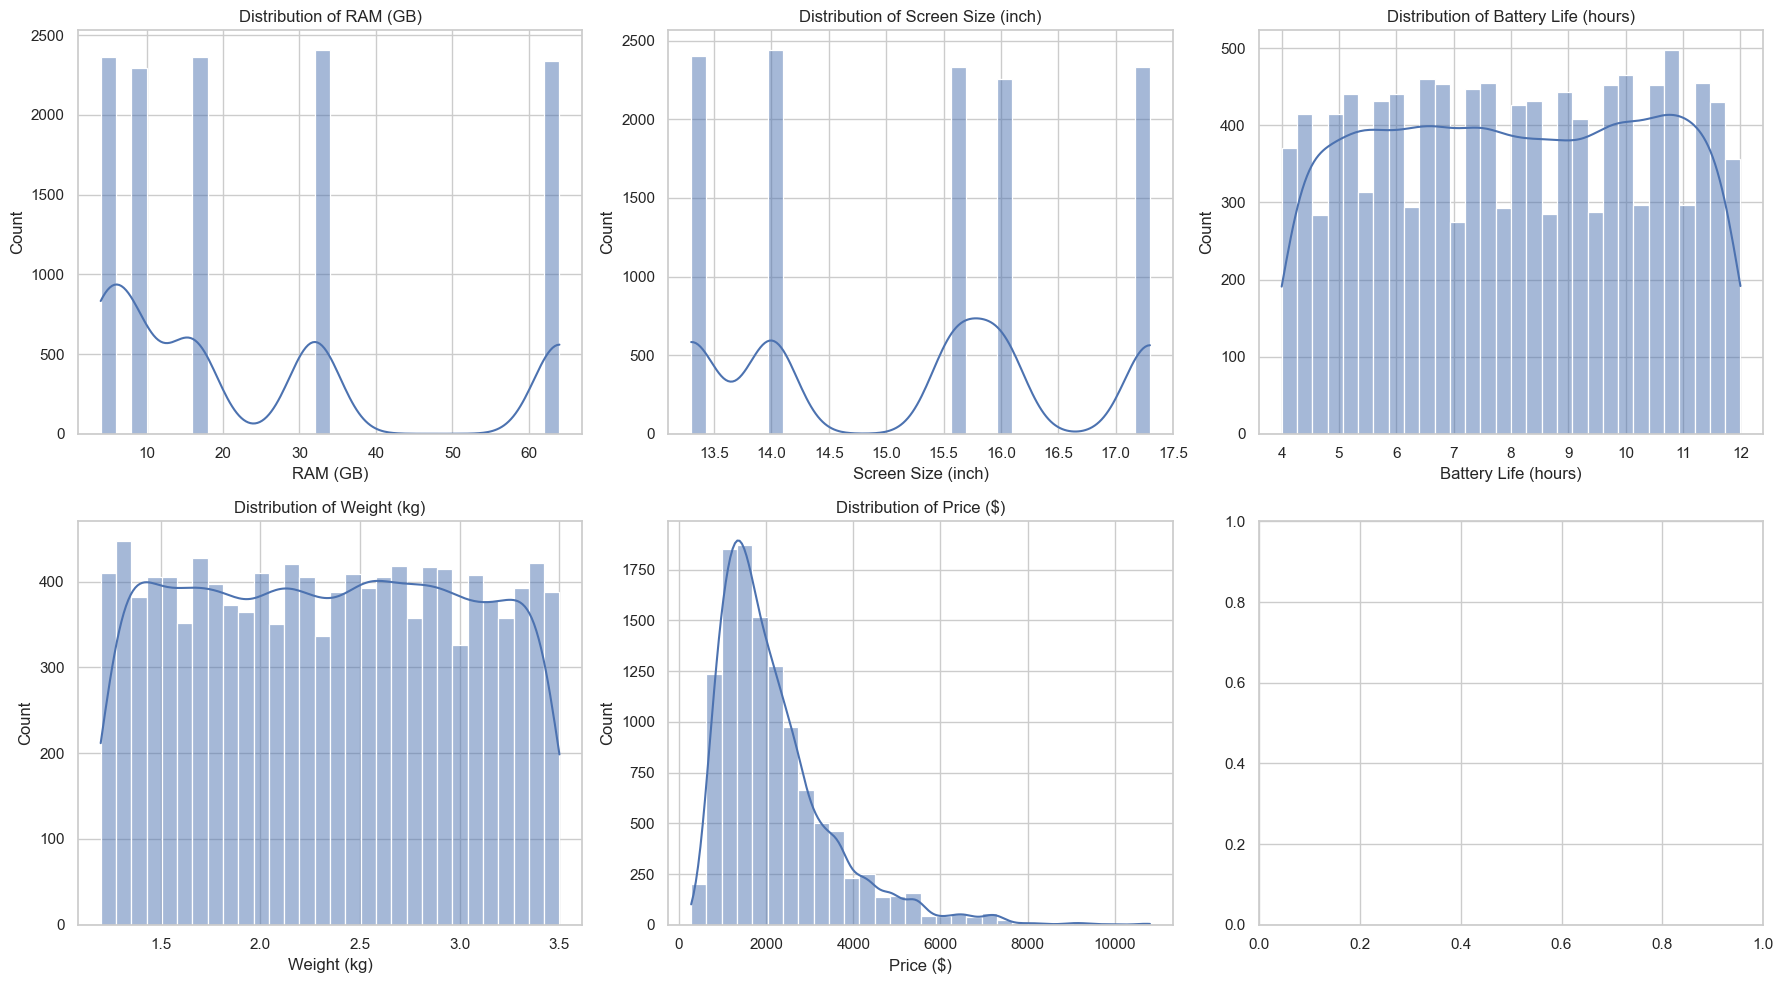

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
numerical_cols = ["RAM (GB)", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Price ($)"]
for i, col in enumerate(numerical_cols):
    row, col_num = divmod(i, 3)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_num])
    axes[row, col_num].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


RAM (GB): Ranges from 4GB to 64GB, with a median of 16GB.
Screen Size: Most laptops have screens between 13.3" and 17.3", with a median around 15.6".
Battery Life: Varies from 4 to 12 hours, with an average of 8 hours.
Weight: Ranges from 1.2kg to 3.5kg, with a median around 2.34kg.
Price: Wide range from $279 to $10,807, with an average of $2,183.

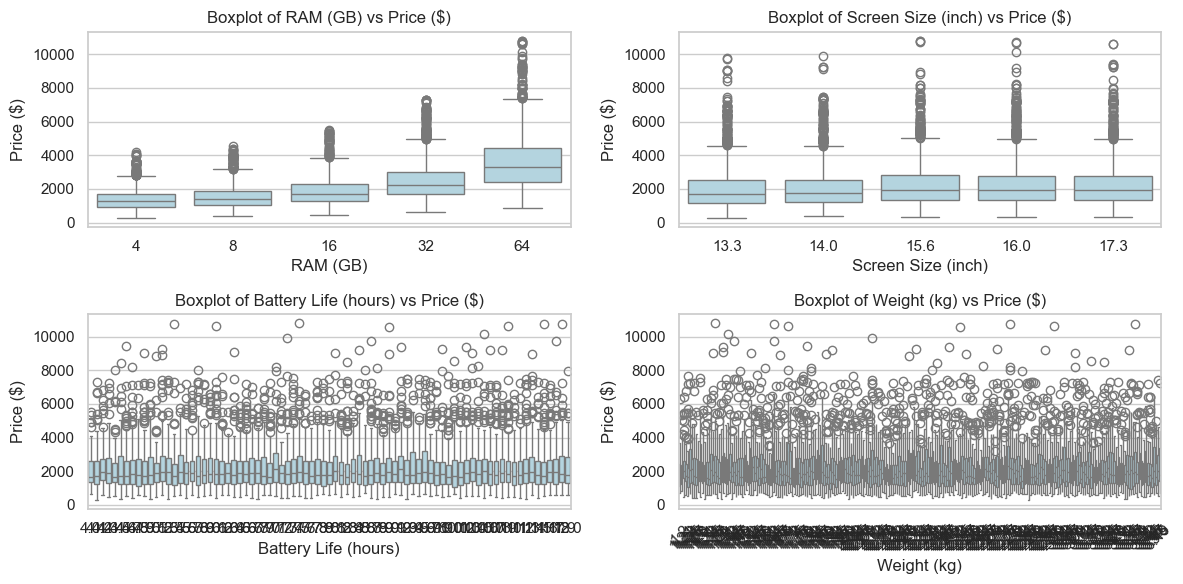

In [16]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df["Price ($)"], x=df[col], color='lightblue')
    plt.title(f"Boxplot of {col} vs Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
categorical_columns = ["Brand", "Processor", "Storage", "GPU", "Resolution", "Operating System"]

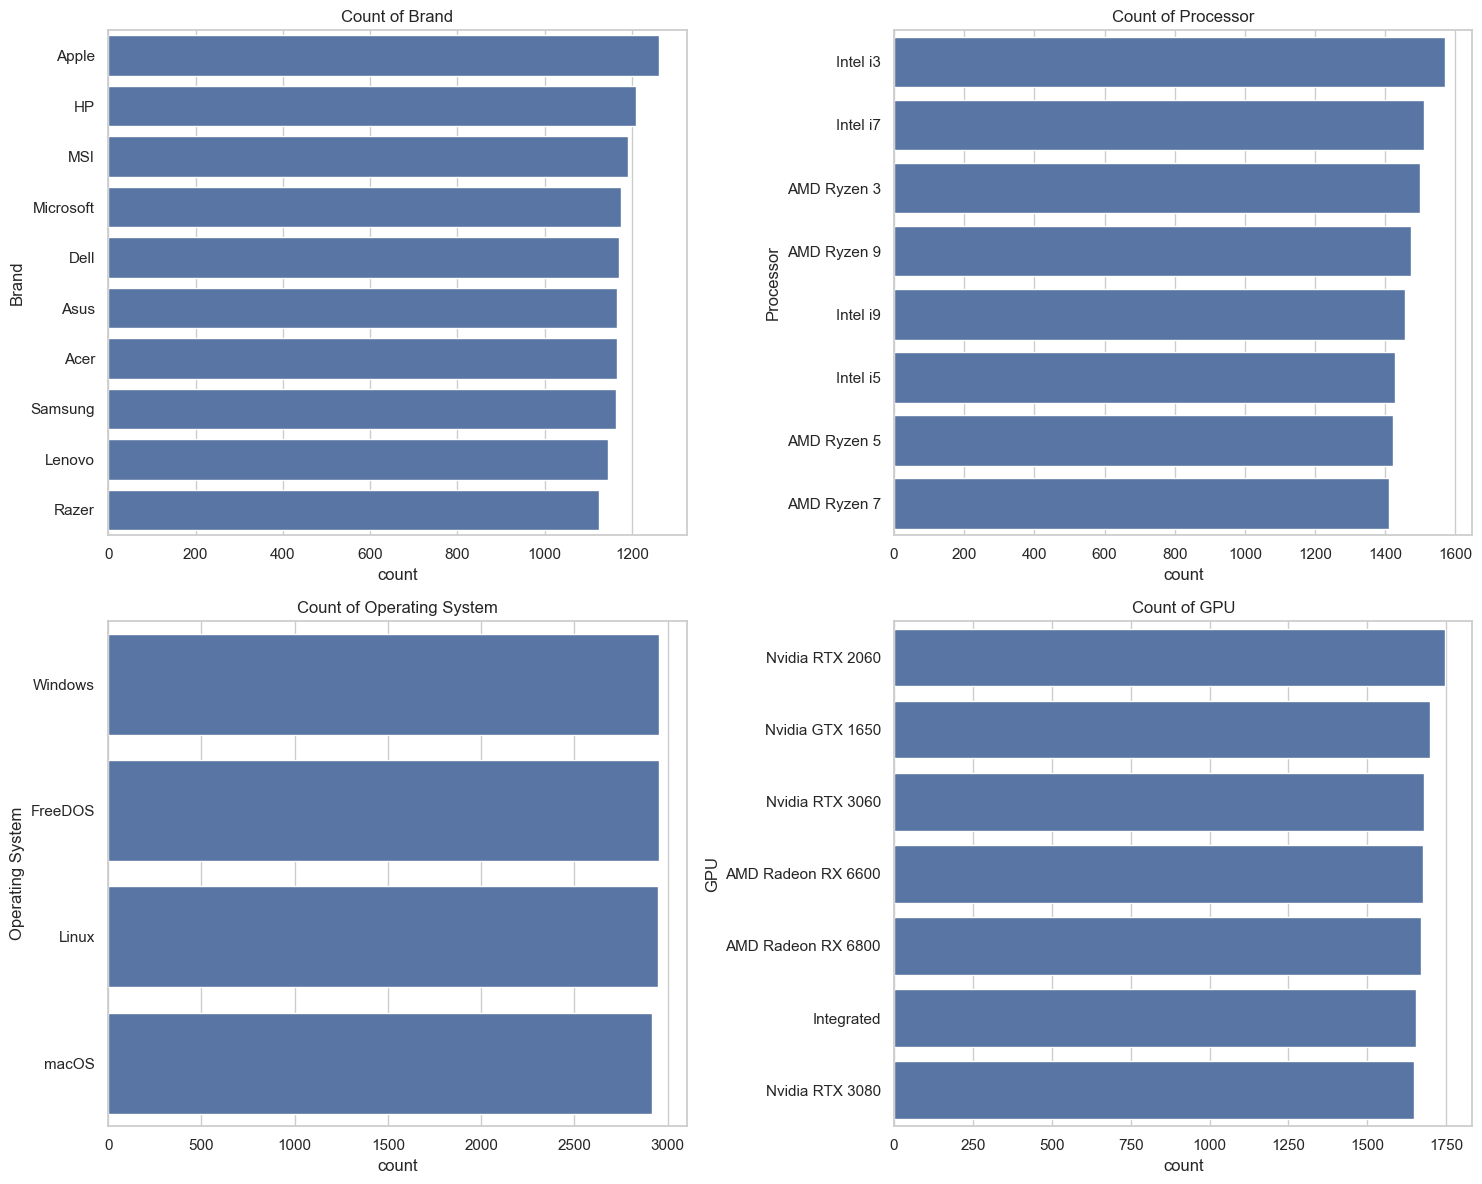

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
categorical_cols = ["Brand", "Processor", "Operating System", "GPU"]
for i, col in enumerate(categorical_cols):
    row, col_num = divmod(i, 2)
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[row, col_num])
    axes[row, col_num].set_title(f"Count of {col}")
plt.tight_layout()
plt.show()

Brand: Some brands are more common than others, with Apple, Asus, and Lenovo appearing frequently.
Processor: Intel and AMD are the dominant players.
Operating System: Windows is the most common, followed by Linux and FreeDOS.
GPU: Nvidia and AMD Radeon GPUs are widely used

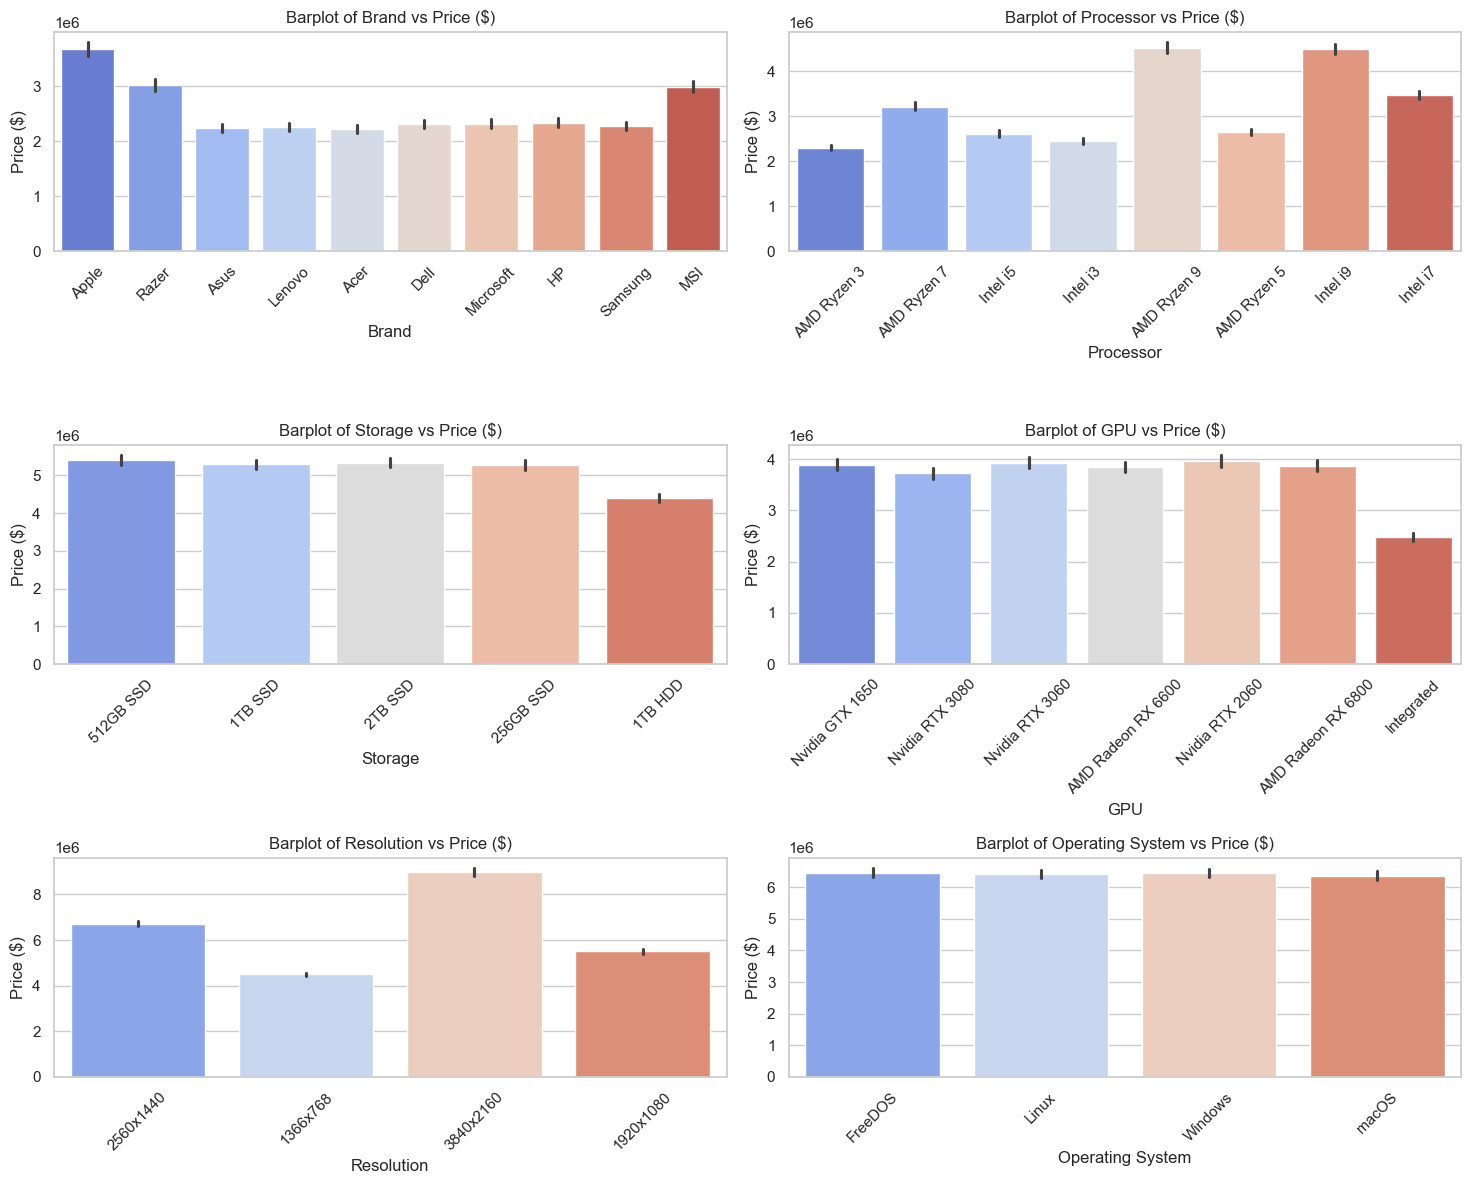

In [18]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i+1)
    sns.barplot(x=df[col],y=df["Price ($)"],  estimator=sum, palette="coolwarm")
    plt.title(f"Barplot of {col} vs Price ($)")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MULTIVARIATE ANALYSIS

In [19]:
df['Storage (GB)'] = df['Storage'].str.extract(r'(\d+)').astype(float)
df[['Res_Width', 'Res_Height']] = df['Resolution'].str.extract(r'(\d+)x(\d+)').astype(float)

In [20]:
df_cleaned = df[['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)',
                 'Storage (GB)', 'Res_Width', 'Res_Height', 'Price ($)']]

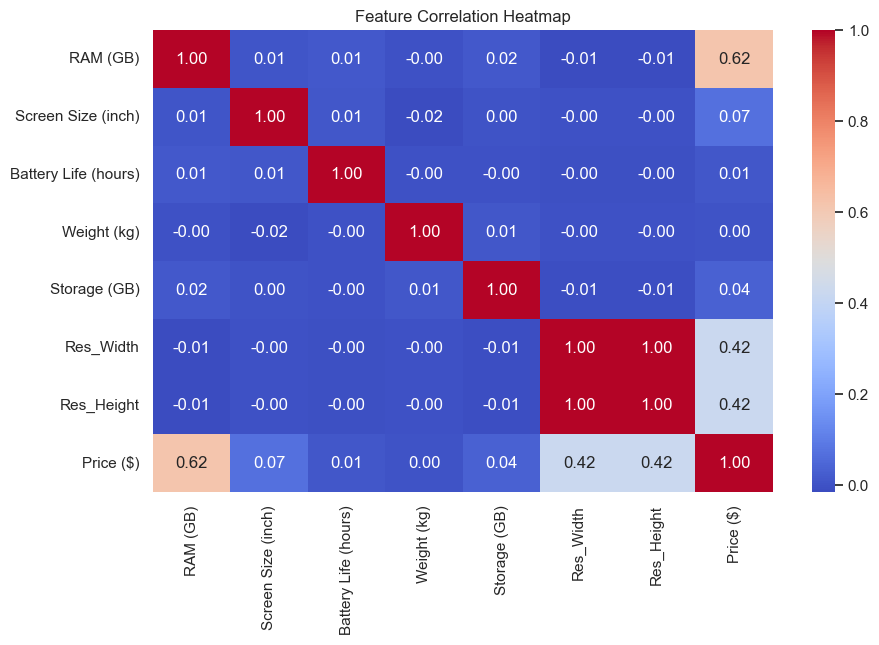

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

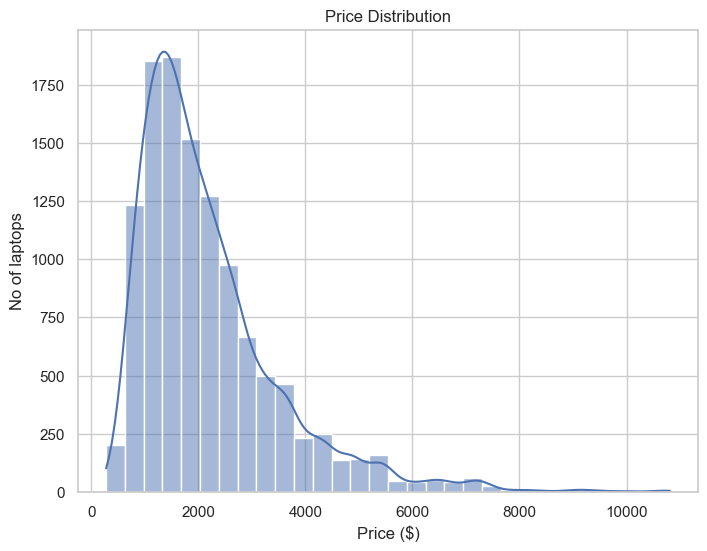

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(df["Price ($)"], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("No of laptops")
plt.show()

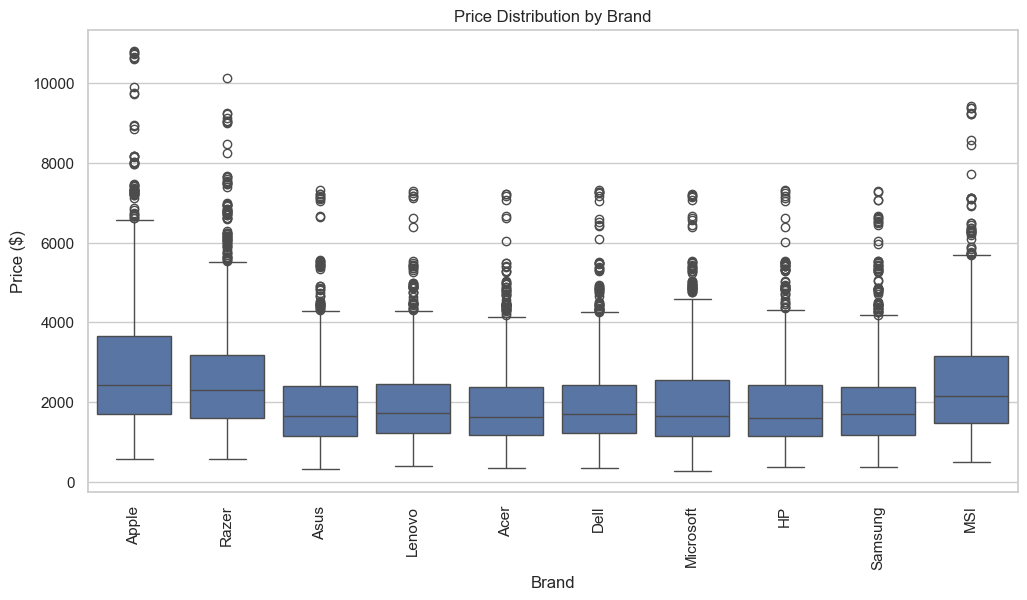

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Brand", y="Price ($)", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution by Brand")
plt.show()

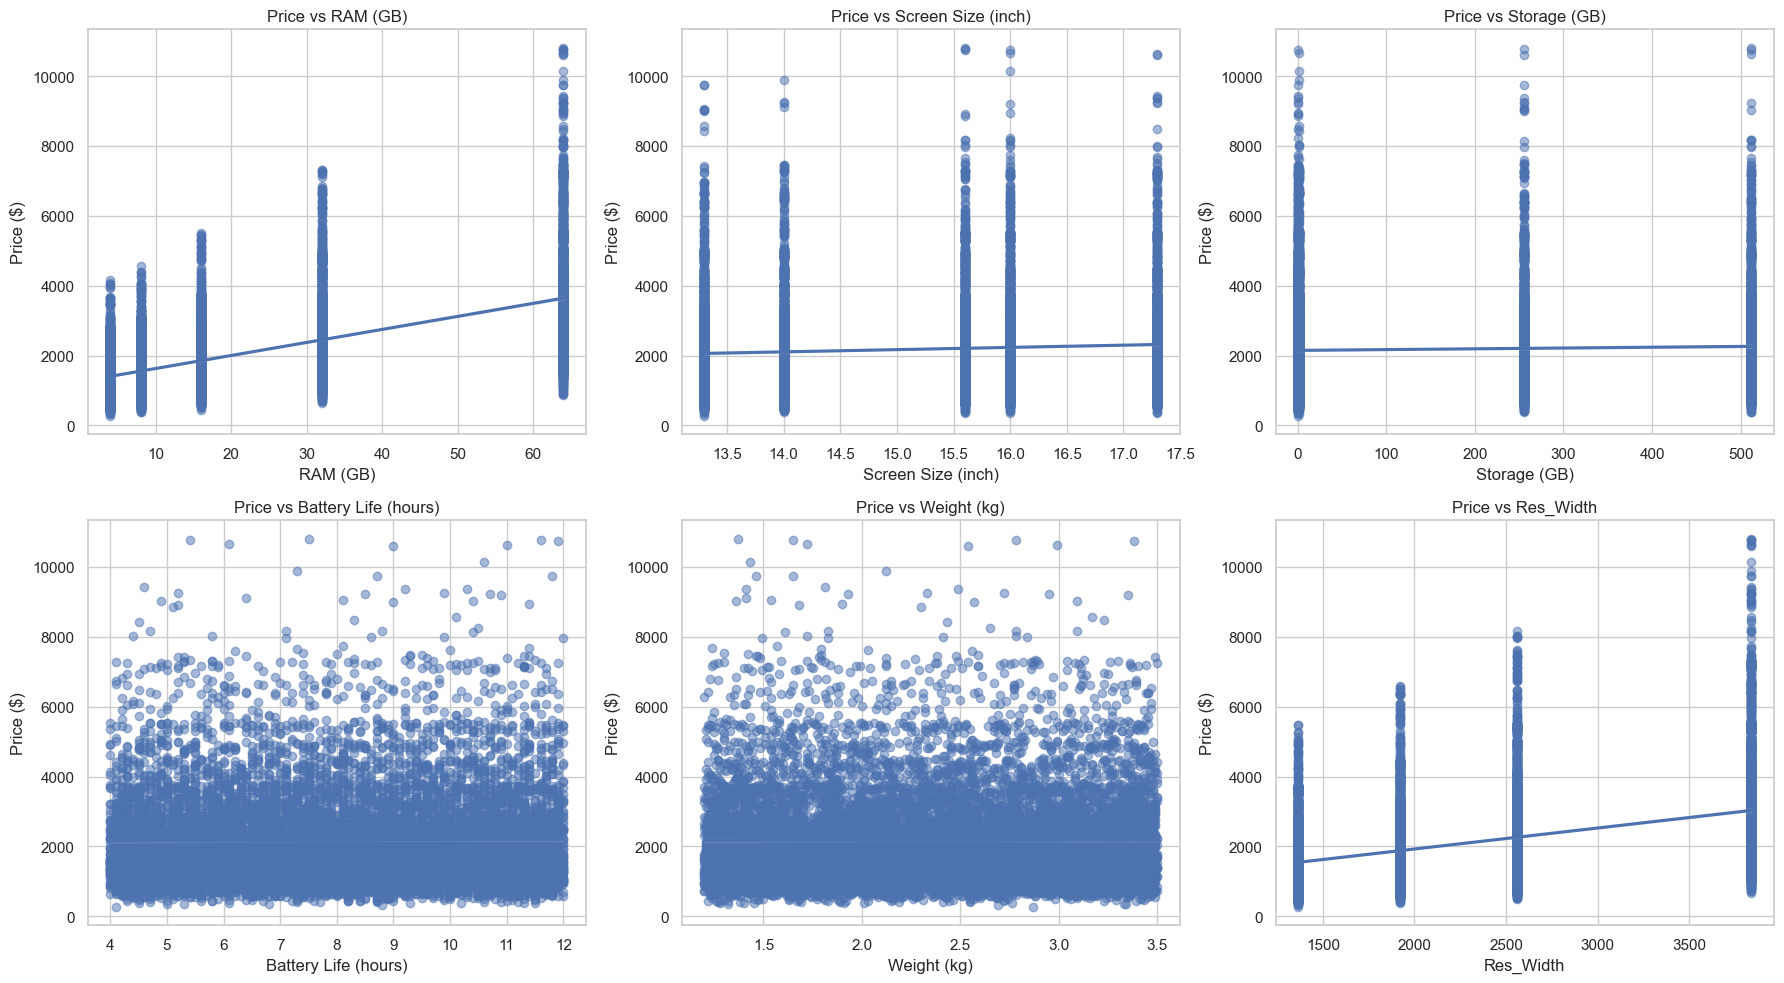

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = ['RAM (GB)', 'Screen Size (inch)', 'Storage (GB)', 'Battery Life (hours)', 'Weight (kg)', 'Res_Width']
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.regplot(x=df_cleaned[feature], y=df_cleaned['Price ($)'], ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].set_title(f'Price vs {feature}')

plt.tight_layout()
plt.show()


In [25]:
X = df_cleaned.drop(columns=['Price ($)'])  # Independent variables
y = df_cleaned['Price ($)']  # Dependent variable
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Price ($)   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     2215.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:46:38   Log-Likelihood:                -96280.
No. Observations:               11768   AIC:                         1.926e+05
Df Residuals:                   11760   BIC:                         1.926e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1198.5067 